In [1]:
#pip install tf_keras #To avoid keras layers issue during transfer learning

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-05-18 02:43:20.678545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 02:43:20.678658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 02:43:20.815073: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/sports-balls-multiclass-image-classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '/kaggle/input/sports-balls-multiclass-image-classification'
There are 15 directories and 0 images in '/kaggle/input/sports-balls-multiclass-image-classification/test'
There are 0 directories and 124 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/rugby_ball'
There are 0 directories and 133 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/hockey_ball'
There are 0 directories and 109 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/volleyball'
There are 0 directories and 138 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/golf_ball'
There are 0 directories and 151 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/football'
There are 0 directories and 108 images in '/kaggle/input/sports-balls-multiclass-image-classification/test/shuttlecock'
There are 0 directories and 100 images in '/kaggle/input/sports-balls-multiclas

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/input/sports-balls-multiclass-image-classification/test") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)
print(len(class_names))

['american_football' 'baseball' 'basketball' 'billiard_ball'
 'bowling_ball' 'cricket_ball' 'football' 'golf_ball' 'hockey_ball'
 'hockey_puck' 'rugby_ball' 'shuttlecock' 'table_tennis_ball'
 'tennis_ball' 'volleyball']
15


In [7]:
# View an image
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.figure()
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (700, 700, 3)
Image shape: (171, 294, 3)
Image shape: (500, 375, 3)
Image shape: (163, 310, 3)
Image shape: (627, 2000, 3)
Image shape: (225, 225, 3)
Image shape: (225, 225, 3)
Image shape: (994, 1500, 3)
Image shape: (228, 221, 3)
Image shape: (183, 275, 3)
Image shape: (500, 500, 3)
Image shape: (251, 201, 3)
Image shape: (225, 225, 3)
Image shape: (316, 966, 3)
Image shape: (1390, 1300, 3)


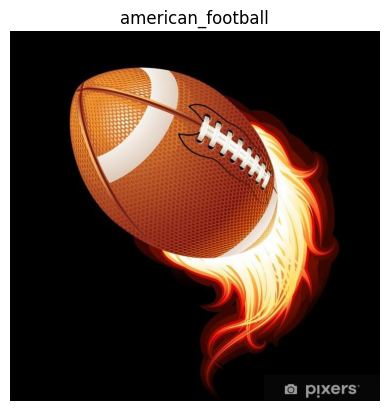

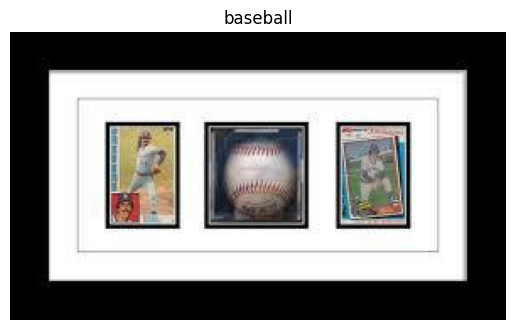

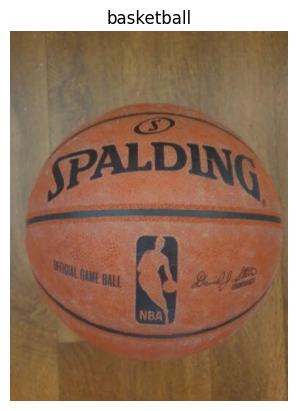

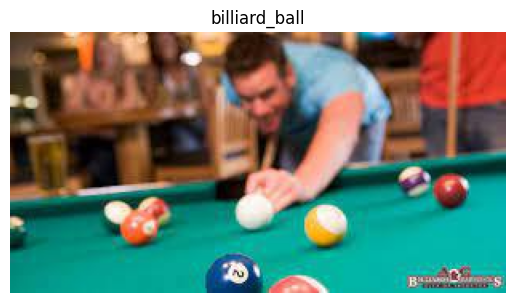

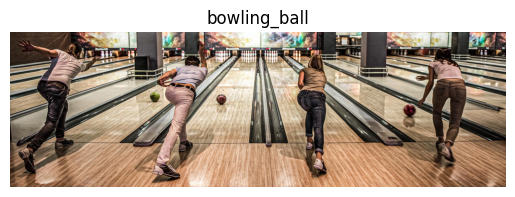

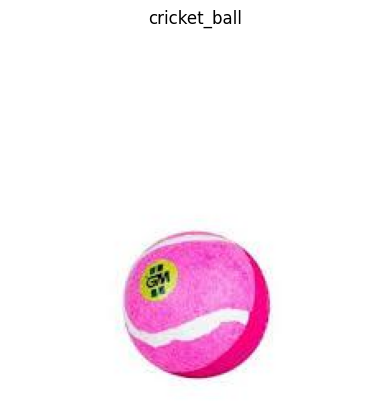

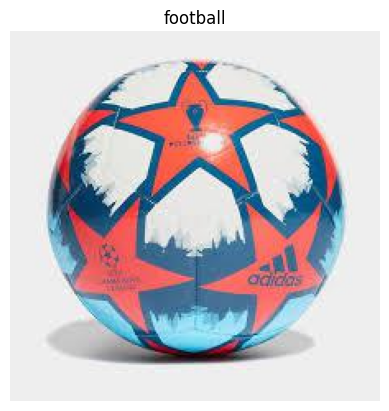

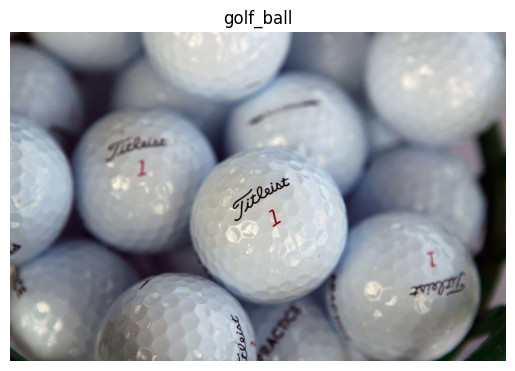

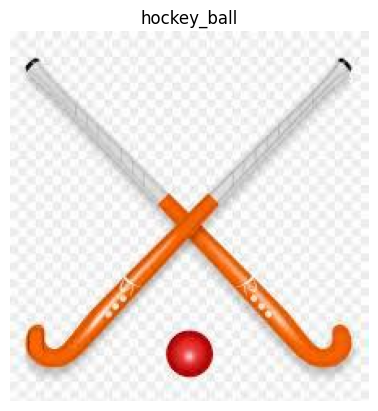

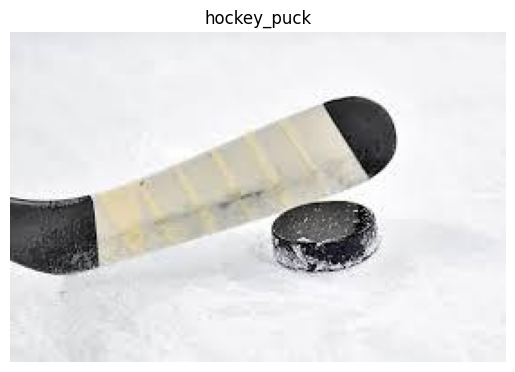

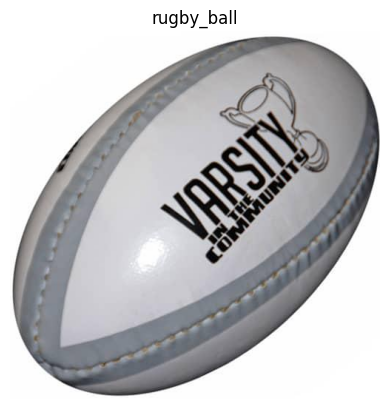

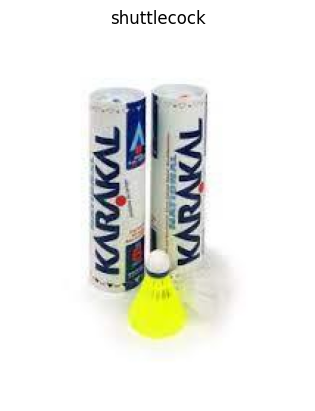

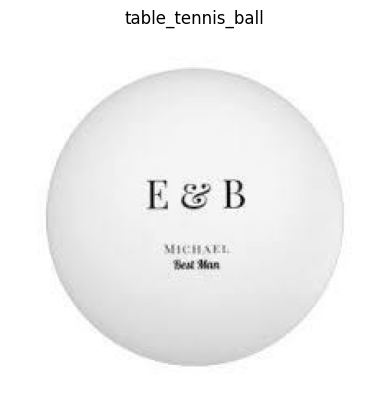

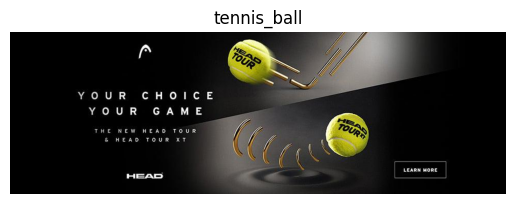

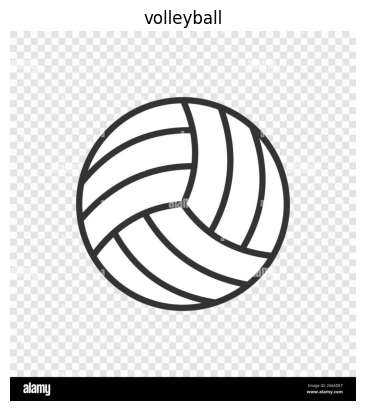

In [12]:
#View a random image from the training dataset
for item in class_names:
    img = view_random_image(target_dir="/kaggle/input/sports-balls-multiclass-image-classification/train/",target_class=item)

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")

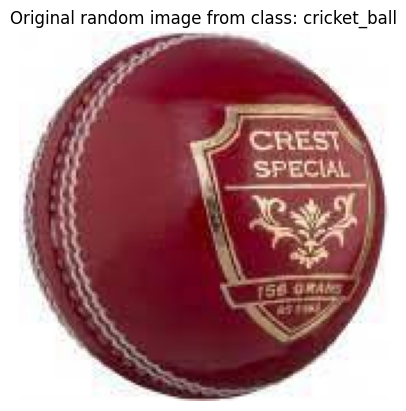

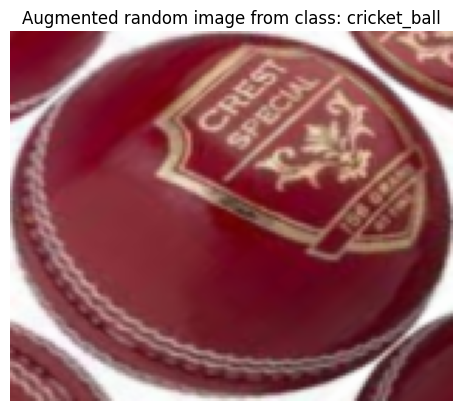

In [14]:
target_class = random.choice(class_names) # choose a random class
target_dir = "/kaggle/input/sports-balls-multiclass-image-classification/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [15]:
IMG_SIZE = (224, 224) # define image size
train_dir = "/kaggle/input/sports-balls-multiclass-image-classification/train"
test_dir = "/kaggle/input/sports-balls-multiclass-image-classification/test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=32) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)
     

Found 7328 files belonging to 15 classes.
Found 1841 files belonging to 15 classes.


In [16]:
train_data.class_names

['american_football',
 'baseball',
 'basketball',
 'billiard_ball',
 'bowling_ball',
 'cricket_ball',
 'football',
 'golf_ball',
 'hockey_ball',
 'hockey_puck',
 'rugby_ball',
 'shuttlecock',
 'table_tennis_ball',
 'tennis_ball',
 'volleyball']

## Creating call backs

In [18]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

def create_model_checkpoint(model_name,patience=5):
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=patience)
    checkpoint_callback = ModelCheckpoint(filepath=f"{model_name}.keras", monitor='val_accuracy', save_best_only=True)
    return [early_stopping_callback,checkpoint_callback]

# Training the model with base CNN

In [21]:
# Create a CNN model 
model_base = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax") # output
])

# Compile the model
model_base.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [26]:
model_base_history = model_base.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25* len(test_data)), # validate for less steps
                        callbacks=create_model_checkpoint(model_name="model_1",patience=10))

Epoch 1/100
229/229 [==============================] - 13s 56ms/step - loss: 2.4971 - accuracy: 0.1932 - val_loss: 3.0612 - val_accuracy: 0.0893
Epoch 2/100
229/229 [==============================] - 14s 58ms/step - loss: 2.4171 - accuracy: 0.2065 - val_loss: 3.9197 - val_accuracy: 0.1049
Epoch 3/100
229/229 [==============================] - 14s 59ms/step - loss: 2.3474 - accuracy: 0.2264 - val_loss: 4.3394 - val_accuracy: 0.1071
Epoch 4/100
229/229 [==============================] - 14s 58ms/step - loss: 2.2971 - accuracy: 0.2500 - val_loss: 3.7872 - val_accuracy: 0.1205
Epoch 5/100
229/229 [==============================] - 14s 58ms/step - loss: 2.3791 - accuracy: 0.2357 - val_loss: 4.1983 - val_accuracy: 0.1094
Epoch 6/100
229/229 [==============================] - 13s 56ms/step - loss: 2.2615 - accuracy: 0.2635 - val_loss: 5.7005 - val_accuracy: 0.1272
Epoch 7/100
229/229 [==============================] - 14s 58ms/step - loss: 2.2807 - accuracy: 0.2687 - val_loss: 6.0223 - val_ac

In [40]:
best_model_base =  tf.keras.models.load_model('model_1.keras')
loss,accuracy = best_model_base.evaluate(test_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

58/58 [==============================] - 3s 43ms/step - loss: 5.8971 - accuracy: 0.1070
Model loss on the test set: 5.897123336791992
Model accuracy on the test set: 10.70%


<Axes: >

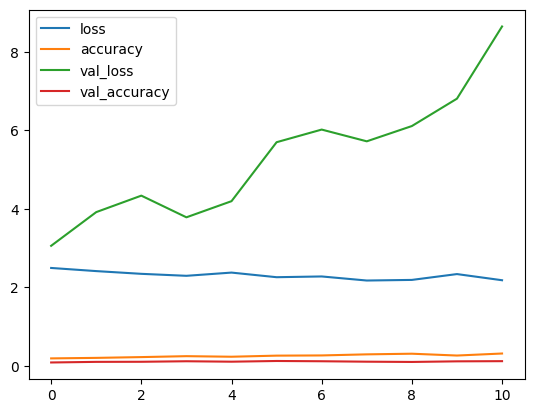

In [41]:
pd.DataFrame(model_base_history.history).plot()

# Transfer learning using EfficientNetV2B0 

In [30]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_transfer = tf.keras.Model(inputs, outputs)

# Compile the model
model_transfer.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_model_transfer = model_transfer.fit(train_data,
                    epochs=100,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    callbacks=create_model_checkpoint(model_name="model_transfer",patience=10))
     

Epoch 1/100
229/229 [==============================] - 29s 95ms/step - loss: 1.2120 - accuracy: 0.6711 - val_loss: 0.6121 - val_accuracy: 0.8348
Epoch 2/100
229/229 [==============================] - 22s 96ms/step - loss: 0.7004 - accuracy: 0.7979 - val_loss: 0.5165 - val_accuracy: 0.8438
Epoch 3/100
229/229 [==============================] - 21s 91ms/step - loss: 0.5983 - accuracy: 0.8238 - val_loss: 0.4218 - val_accuracy: 0.8638
Epoch 4/100
229/229 [==============================] - 20s 84ms/step - loss: 0.5334 - accuracy: 0.8414 - val_loss: 0.4352 - val_accuracy: 0.8705
Epoch 5/100
229/229 [==============================] - 19s 81ms/step - loss: 0.4931 - accuracy: 0.8562 - val_loss: 0.4187 - val_accuracy: 0.8638
Epoch 6/100
229/229 [==============================] - 19s 83ms/step - loss: 0.4508 - accuracy: 0.8683 - val_loss: 0.3978 - val_accuracy: 0.8750
Epoch 7/100
229/229 [==============================] - 20s 83ms/step - loss: 0.4321 - accuracy: 0.8691 - val_loss: 0.3824 - val_ac

In [32]:
# Loading the best model
best_model_transfer =  tf.keras.models.load_model('model_transfer.keras')
loss,accuracy = best_model_transfer.evaluate(test_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

58/58 [==============================] - 6s 50ms/step - loss: 0.3824 - accuracy: 0.8935
Model loss on the test set: 0.38235920667648315
Model accuracy on the test set: 89.35%


<Axes: >

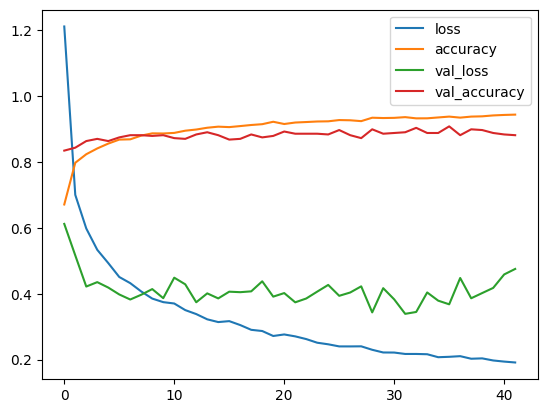

In [37]:
pd.DataFrame(history_model_transfer.history).plot()

# Transfer learning using EfficientNet with unfreezing top 10 layers

In [35]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model_2.trainable = True

for layer in base_model_2.layers[:-10]:
    layer.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model_2(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dense(64, activation="relu", name="custom_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(len(class_names), activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_transfer_unfreeze_last_10 = tf.keras.Model(inputs, outputs)

# Compile the model
model_transfer_unfreeze_last_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_model_transfer_unfreeze_last_10 = model_transfer_unfreeze_last_10.fit(train_data,
                    epochs=100,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    callbacks=create_model_checkpoint(model_name="model_transfer_unfreeze_last_10",patience=10))

Epoch 1/100
229/229 [==============================] - 28s 78ms/step - loss: 0.8899 - accuracy: 0.7279 - val_loss: 0.4905 - val_accuracy: 0.8638
Epoch 2/100
229/229 [==============================] - 16s 66ms/step - loss: 0.4687 - accuracy: 0.8549 - val_loss: 0.3995 - val_accuracy: 0.8839
Epoch 3/100
229/229 [==============================] - 15s 64ms/step - loss: 0.3523 - accuracy: 0.8895 - val_loss: 0.3796 - val_accuracy: 0.8973
Epoch 4/100
229/229 [==============================] - 14s 60ms/step - loss: 0.2567 - accuracy: 0.9213 - val_loss: 0.4777 - val_accuracy: 0.8884
Epoch 5/100
229/229 [==============================] - 14s 58ms/step - loss: 0.2103 - accuracy: 0.9296 - val_loss: 0.4005 - val_accuracy: 0.8929
Epoch 6/100
229/229 [==============================] - 15s 65ms/step - loss: 0.1694 - accuracy: 0.9465 - val_loss: 0.4270 - val_accuracy: 0.9107
Epoch 7/100
229/229 [==============================] - 14s 59ms/step - loss: 0.1366 - accuracy: 0.9573 - val_loss: 0.5299 - val_ac

In [42]:

# Loading the best model
best_model_transfer_unfreeze_last_10 =  tf.keras.models.load_model('model_transfer_unfreeze_last_10.keras')
loss,accuracy = best_model_transfer_unfreeze_last_10.evaluate(test_data)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

58/58 [==============================] - 7s 47ms/step - loss: 0.4019 - accuracy: 0.9039
Model loss on the test set: 0.4018620252609253
Model accuracy on the test set: 90.39%


In [43]:
# Save the entire model as an HDF5 file
best_model_transfer_unfreeze_last_10.save('best_model_balls_predictor.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction with real world image

In [45]:
loaded_model = tf.keras.models.load_model("best_model_balls_predictor.h5")

--2024-05-18 04:00:11--  https://thumbs.dreamstime.com/z/cricket-bat-ball-26570619.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244161 (238K) [image/jpeg]
Saving to: 'cric_ball.jpg'

cric_ball.jpg       100%[===================>] 238.44K  --.-KB/s    in 0.03s   

2024-05-18 04:00:11 (8.38 MB/s) - 'cric_ball.jpg' saved [244161/244161]



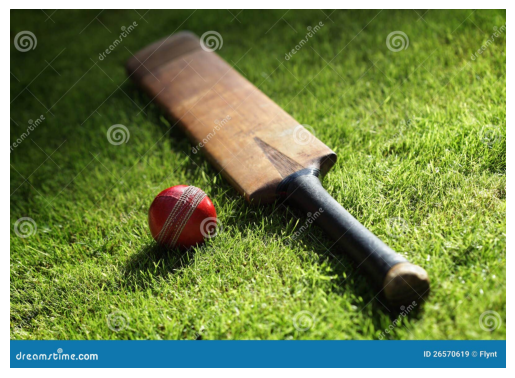

In [47]:
# View our example image
!wget -O cric_ball.jpg https://thumbs.dreamstime.com/z/cricket-bat-ball-26570619.jpg
steak = mpimg.imread("cric_ball.jpg")
plt.imshow(steak)
plt.axis(False);

--2024-05-18 04:03:24--  https://cdn1.vectorstock.com/i/1000x1000/59/60/cartoon-colorful-billiard-ball-isolated-vector-19585960.jpg
Resolving cdn1.vectorstock.com (cdn1.vectorstock.com)... 3.163.158.64, 3.163.158.97, 3.163.158.53, ...
Connecting to cdn1.vectorstock.com (cdn1.vectorstock.com)|3.163.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78245 (76K) [image/jpeg]
Saving to: 'bill_ball.jpg'

bill_ball.jpg       100%[===================>]  76.41K  --.-KB/s    in 0.1s    

2024-05-18 04:03:25 (654 KB/s) - 'bill_ball.jpg' saved [78245/78245]



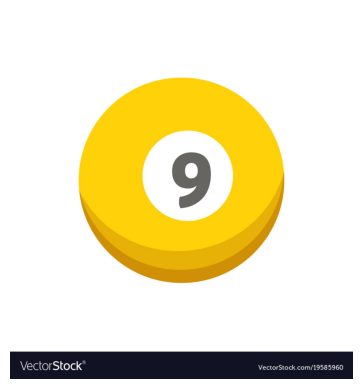

In [58]:
# View our example image
!wget -O bill_ball.jpg https://cdn1.vectorstock.com/i/1000x1000/59/60/cartoon-colorful-billiard-ball-isolated-vector-19585960.jpg
steak = mpimg.imread("bill_ball.jpg")
plt.imshow(steak)
plt.axis(False);

In [54]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  #img = img/255. ############################################# Very important -> This is not needed, because it is handled by the EfficientNetV2B0 layer
  return img

In [55]:

def make_predictions(model,image,class_names):
    
    processed_img = load_and_prep_image(image)
    image_convert_dim = tf.expand_dims(processed_img, axis=0) # add an extra dimension at axis 0
    prediction = model.predict(image_convert_dim)
    output=train_data.class_names[np.argmax(prediction)]
    
    print(f"Type of ball is {output}")

In [56]:
make_predictions(loaded_model,"cric_ball.jpg",train_data.class_names)

1/1 [==============================] - 0s 27ms/step
Type of ball is cricket_ball


In [59]:
make_predictions(loaded_model,"bill_ball.jpg",train_data.class_names)

1/1 [==============================] - 0s 29ms/step
Type of ball is billiard_ball
